In [1]:
from qat.lang.AQASM import *
from qat.qpus import PyLinalg
import matplotlib.pyplot as plt
import time as time
#from qat.lang.AQASM import AbstractGate,CTRL
import numpy as np


Question 1)
On choisit la porte X ,l'objectif est de mettre X=$e^{i\alpha} R_z (\beta) R_y (\gamma) R_z (\delta)$
Ainsi on prend la matrice du cours et on résoud le système associé
On trouve ainsi $\alpha=-\pi/2$ $\beta=0$ $\gamma=\pi$ $\delta=\pi$
On peut ainsi écrire X=$e^{i0} R_z (0) R_y (0) R_z (1)$
Or d'après le cours on a 
$$ 
A = RZ(\frac{\beta}) RY(\frac{\gamma}{2})
\newline
B = RY \left(-\frac{\gamma}{2}\right) RZ \left(-\frac{\beta + \delta}{2}\right)
\newline
C = RZ \left(\frac{\delta - \beta}{2}\right)$$

Question 2)

In [3]:
from qat.lang.AQASM import AbstractGate
import numpy as np
def Phase_generator(theta):
    return np.array([[np.exp(1j * theta), 0],
[0, np.exp(1j * theta)]])
GlobalPhase = AbstractGate("Phase",
    [float],
    arity=1,
    matrix_generator=Phase_generator)

State |1> with amplitude (0.7071067811865477-0.7071067811865477j) and probability 100.0 %
Le nombre de porte est :  8


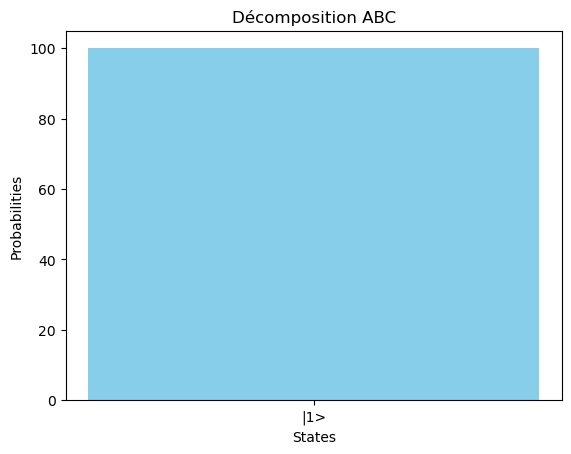

In [9]:
compteur = 0
prog = Program()
#définition des constantes
alpha=-np.pi/2
beta=0
gamma=np.pi
delta=np.pi
#début du circuit
qbits = prog.qalloc(1)
#porte C
prog.apply(RZ(delta-beta/2), qbits[0])
compteur = compteur + 1
prog.apply(X,qbits[0])
compteur = compteur + 1
#porte B
prog.apply(RZ((-beta+delta)/2), qbits[0])
compteur = compteur + 1
prog.apply(RY(-gamma/2), qbits[0])
compteur = compteur + 1
prog.apply(X,qbits[0])
compteur = compteur + 1
#porte A
prog.apply(RY(gamma/2), qbits[0])
compteur = compteur + 1
prog.apply(RZ((beta)), qbits[0])
compteur = compteur + 1
#phase
prog.apply(GlobalPhase(0), qbits)
compteur = compteur + 1
circuit = prog.to_circ()
circuit.display()
job = circuit.to_job()

linalgqpu = PyLinalg()
result = linalgqpu.submit(job)
l = len(result)
states = ['']*l
probabilities= [0]*l

i=0
for sample in result:
    print("State",sample.state,"with amplitude",
            sample.amplitude,"and probability",
            round(sample.probability*100,2),"%")
    states[i] = str(sample.state)
    probabilities[i] = round(sample.probability*100,2)
    i = i+1
print("Le nombre de porte est : ", compteur)
plt.bar(states, probabilities, color='skyblue')
plt.xlabel('States')
plt.ylabel('Probabilities')
plt.title('Décomposition ABC')
plt.show()


Question3
On utilisera la porte swap composé de trois Cnot sachant que la CNot se décompse en 

State |11> with amplitude (0.7071067811865477-0.7071067811865477j) and probability 100.0 %
Le nombre de porte est :  8


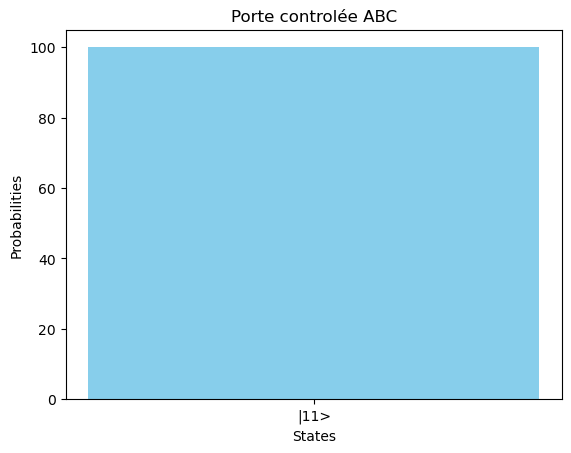

In [12]:
compteur_porte = 0
prog = Program()
#définition des constantes
#définition des constantes
alpha=-np.pi/2
beta=0
gamma=np.pi
delta=np.pi
#début du circuit
qbits = prog.qalloc(2)
#essaie de qbit 10
prog.apply(X,qbits[0])
#essaie de qbits 01
#prog.apply(X,qbits[1])
#porte C
prog.apply(RZ(delta-beta/2), qbits[1])
compteur_porte = compteur_porte + 1
prog.apply(CNOT,qbits[0],qbits[1])
compteur_porte = compteur_porte + 1
#porte B
prog.apply(RZ((-beta+delta)/2), qbits[1])
compteur_porte = compteur_porte + 1
prog.apply(RY(-gamma/2), qbits[1])
compteur_porte = compteur_porte + 1
prog.apply(CNOT,qbits[0],qbits[1])
compteur_porte = compteur_porte + 1
#porte A
prog.apply(RY(gamma/2), qbits[1])
compteur_porte = compteur_porte + 1
prog.apply(RZ((beta)), qbits[1])
compteur_porte = compteur_porte + 1
#phase
prog.apply(GlobalPhase(0), qbits[1])
compteur_porte = compteur_porte + 1
#fin de circuit
circuit = prog.to_circ()
circuit.display()
job = circuit.to_job()
linalgqpu = PyLinalg()
result = linalgqpu.submit(job)
l = len(result)
states = ['']*l
probabilities= [0]*l
i=0
for sample in result:
    print("State",sample.state,"with amplitude",
            sample.amplitude,"and probability",
            round(sample.probability*100,2),"%")
    states[i] = str(sample.state)
    probabilities[i] = round(sample.probability*100)
    i = i+1
print("Le nombre de porte est : ", compteur_porte)
plt.bar(states, probabilities, color='skyblue')
plt.xlabel('States')
plt.ylabel('Probabilities')
plt.title('Porte controlée ABC')
plt.show()

Question 4)
On sait que $V^{2} = X$
On veut trouver la racine de X
detailler la méthode
Or on a $ RX = \frac{1}{\sqrt{2}}\begin{pmatrix} 1+i & 1-i \\ 1-i & 1+i \end{pmatrix}$

In [36]:
def rootx():
    return np.array((1/2)*[[-1+1j, -1-1j],
[-1-1j, -1+1j]])
def rootx_dag():
    return np.array((1/2)*[[-1-1j, -1+1j],
[-1+1j, -1-1j]])

rootX = AbstractGate("Phase",
    [float],
    arity=1,
    matrix_generator=rootx)
rootXdag = AbstractGate("Phase",
    [float],
    arity=1,
    matrix_generator=rootx_dag)

State |111> with amplitude -1.0000000000000002j and probability 100.0 %
Le nombre de porte est :  5


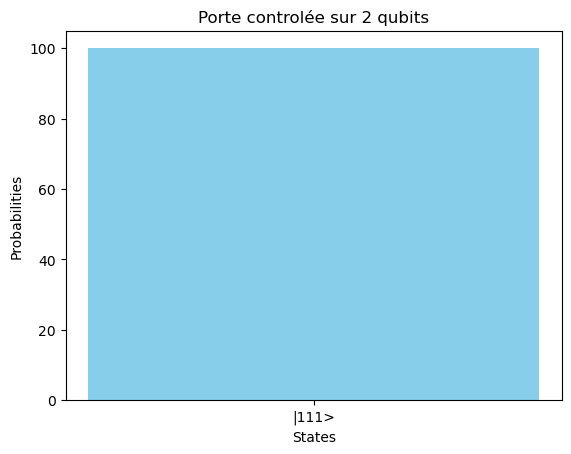

In [16]:
compteur_porte = 0
prog = Program()
#début du circuit
qbits = prog.qalloc(3)


#essaie de qbit 111
prog.apply(X,qbits[0])
prog.apply(X,qbits[1])

#essaie de qbits 01
#prog.apply(X,qbits[1])


#porte RX
prog.apply((RX(np.pi/2).ctrl()), qbits[1], qbits[2])
compteur_porte = compteur_porte + 1
#porte CNOT
prog.apply(CNOT,qbits[0],qbits[1])
compteur_porte = compteur_porte + 1
#porte RXdag
prog.apply((RX(-np.pi/2).ctrl()), qbits[1], qbits[2])
compteur_porte = compteur_porte + 1
#porte CNOT
prog.apply(CNOT,qbits[0],qbits[1])
compteur_porte = compteur_porte + 1
#porte RX
prog.apply((RX(np.pi/2).ctrl()), qbits[0], qbits[2])
compteur_porte = compteur_porte + 1
#fin de circuit


circuit = prog.to_circ()
circuit.display()
job = circuit.to_job()
linalgqpu = PyLinalg()
result = linalgqpu.submit(job)
l = len(result)
states = ['']*l
probabilities= [0]*l
i=0
for sample in result:
    print("State",sample.state,"with amplitude",
            sample.amplitude,"and probability",
            round(sample.probability*100,2),"%")
    states[i] = str(sample.state)
    probabilities[i] = round(sample.probability*100)
    i = i+1
print("Le nombre de porte est : ", compteur_porte)
plt.bar(states, probabilities, color='skyblue')
plt.xlabel('States')
plt.ylabel('Probabilities')
plt.title('Porte controlée sur 2 qubits')
plt.show()

Question5)
Comme avant nous alons coder sauf que cette fois c'est une racine 4ème 
donc c'est une rotation en X de $\frac{\pi}{4}$

State |0000> with amplitude (1+0j) and probability 100.0 %
Le nombre de porte est :  13


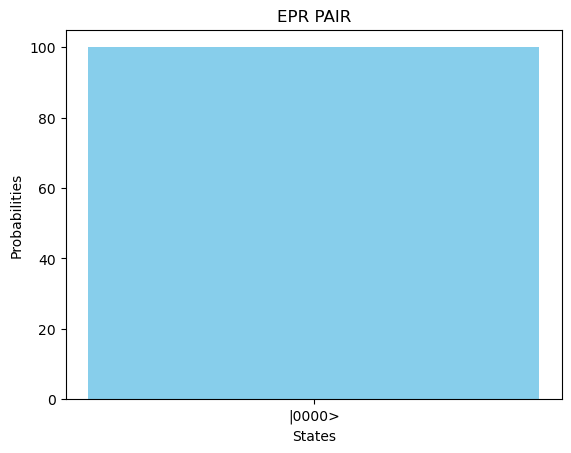

In [19]:
compteur_porte = 0
prog = Program()
#début du circuit
qbits = prog.qalloc(4)


#essaie de qbit 111
#prog.apply(X,qbits[0])
#prog.apply(X,qbits[1])
#prog.apply(X,qbits[2])

#essaie de qbits 010
#prog.apply(X,qbits[1])


#porte RX
prog.apply((RX(np.pi/4).ctrl()), qbits[0], qbits[3])
compteur_porte = compteur_porte + 1
#porte CNOT
prog.apply(CNOT,qbits[0],qbits[1])
compteur_porte = compteur_porte + 1
#porte RXdag
prog.apply((RX(-np.pi/4).ctrl()), qbits[1], qbits[3])
compteur_porte = compteur_porte + 1
#porte CNOT
prog.apply(CNOT,qbits[0],qbits[1])
compteur_porte = compteur_porte + 1
#porte RX
prog.apply((RX(np.pi/4).ctrl()), qbits[1], qbits[3])
compteur_porte = compteur_porte + 1
#porte CNOT
prog.apply(CNOT,qbits[1],qbits[2])
compteur_porte = compteur_porte + 1
#porte RX
prog.apply((RX(-np.pi/4).ctrl()), qbits[2], qbits[3])
compteur_porte = compteur_porte + 1
#porte CNOT
prog.apply(CNOT,qbits[0],qbits[2])
compteur_porte = compteur_porte + 1
#porte RX
prog.apply((RX(np.pi/4).ctrl()), qbits[2], qbits[3])
compteur_porte = compteur_porte + 1
#porte CNOT
prog.apply(CNOT,qbits[1],qbits[2])
compteur_porte = compteur_porte + 1
#porte RX
prog.apply((RX(-np.pi/4).ctrl()), qbits[2], qbits[3])
compteur_porte = compteur_porte + 1
#porte CNOT
prog.apply(CNOT,qbits[0],qbits[2])
compteur_porte = compteur_porte + 1
#porte RX
prog.apply((RX(np.pi/4).ctrl()), qbits[2], qbits[3])
compteur_porte = compteur_porte + 1
#fin de circuit


circuit = prog.to_circ()
circuit.display()
job = circuit.to_job()
linalgqpu = PyLinalg()
result = linalgqpu.submit(job)
l = len(result)
states = ['']*l
probabilities= [0]*l
i=0
for sample in result:
    print("State",sample.state,"with amplitude",
            sample.amplitude,"and probability",
            round(sample.probability*100,2),"%")
    states[i] = str(sample.state)
    probabilities[i] = round(sample.probability*100)
    i = i+1
print("Le nombre de porte est : ", compteur_porte)
plt.bar(states, probabilities, color='skyblue')
plt.xlabel('States')
plt.ylabel('Probabilities')
plt.title('Porte controlée sur 3 qubits')
plt.show()

State |0000> with amplitude (1+0j) and probability 100.0 %
Le nombre de porte est :  13


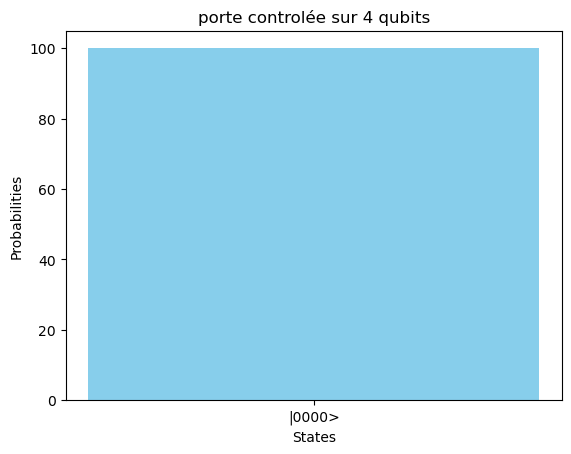

In [27]:
def calculate_sum(n):
    return 3**(n-3)*13 + sum(3**i * 2 for i in range(n-4))

def Cnot4():
    compteur_porte = 0
    prog = Program()
    #début du circuit
    qbits = prog.qalloc(4)
    #porte RX
    prog.apply((RX(np.pi/4).ctrl()), qbits[0], qbits[3])
    compteur_porte = compteur_porte + 1
    #porte CNOT
    prog.apply(CNOT,qbits[0],qbits[1])
    compteur_porte = compteur_porte + 1
    #porte RXdag
    prog.apply((RX(-np.pi/4).ctrl()), qbits[1], qbits[3])
    compteur_porte = compteur_porte + 1
    #porte CNOT
    prog.apply(CNOT,qbits[0],qbits[1])
    compteur_porte = compteur_porte + 1
    #porte RX
    prog.apply((RX(np.pi/4).ctrl()), qbits[1], qbits[3])
    compteur_porte = compteur_porte + 1
    #porte CNOT
    prog.apply(CNOT,qbits[1],qbits[2])
    compteur_porte = compteur_porte + 1
    #porte RX
    prog.apply((RX(-np.pi/4).ctrl()), qbits[2], qbits[3])
    compteur_porte = compteur_porte + 1
    #porte CNOT
    prog.apply(CNOT,qbits[0],qbits[2])
    compteur_porte = compteur_porte + 1
    #porte RX
    prog.apply((RX(np.pi/4).ctrl()), qbits[2], qbits[3])
    compteur_porte = compteur_porte + 1
    #porte CNOT
    prog.apply(CNOT,qbits[1],qbits[2])
    compteur_porte = compteur_porte + 1
    #porte RX
    prog.apply((RX(-np.pi/4).ctrl()), qbits[2], qbits[3])
    compteur_porte = compteur_porte + 1
    #porte CNOT
    prog.apply(CNOT,qbits[0],qbits[2])
    compteur_porte = compteur_porte + 1
    #porte RX
    prog.apply((RX(np.pi/4).ctrl()), qbits[2], qbits[3])
    compteur_porte = compteur_porte + 1
    circuit = prog.to_circ()
    return compteur_porte,circuit
    
def Not():
    compteur = 0
    prog = Program()
    #définition des constantes
    alpha=-np.pi/2
    beta=0
    gamma=np.pi
    delta=np.pi
    #début du circuit
    qbits = prog.qalloc(1)
    #porte C
    prog.apply(RZ(delta-beta/2), qbits[0])
    compteur = compteur + 1
    prog.apply(X,qbits[0])
    compteur = compteur + 1
    #porte B
    prog.apply(RZ((-beta+delta)/2), qbits[0])
    compteur = compteur + 1
    prog.apply(RY(-gamma/2), qbits[0])
    compteur = compteur + 1
    prog.apply(X,qbits[0])
    compteur = compteur + 1
    #porte A
    prog.apply(RY(gamma/2), qbits[0])
    compteur = compteur + 1
    prog.apply(RZ((beta)), qbits[0])
    compteur = compteur + 1
    #phase
    prog.apply(GlobalPhase(0), qbits)
    circuit = prog.to_circ()
    return compteur,circuit
def Cnot3():
    compteur_porte = 0
    prog = Program()
    #début du circuit
    qbits = prog.qalloc(3)


    #essaie de qbit 111
    #prog.apply(X,qbits[0])
    #prog.apply(X,qbits[1])

    #essaie de qbits 01
    #prog.apply(X,qbits[1])


    #porte RX
    prog.apply((RX(np.pi/2).ctrl()), qbits[1], qbits[2])
    compteur_porte = compteur_porte + 1
    #porte CNOT
    prog.apply(CNOT,qbits[0],qbits[1])
    compteur_porte = compteur_porte + 1
    #porte RXdag
    prog.apply((RX(-np.pi/2).ctrl()), qbits[1], qbits[2])
    compteur_porte = compteur_porte + 1
    #porte CNOT
    prog.apply(CNOT,qbits[0],qbits[1])
    compteur_porte = compteur_porte + 1
    #porte RX
    prog.apply((RX(np.pi/2).ctrl()), qbits[0], qbits[2])
    compteur_porte = compteur_porte + 1
    #fin de circuit
    circuit = prog.to_circ()
    return compteur_porte,circuit

def Cnot2():
    prog = Program()
    compteur_porte = 0
    alpha=-np.pi/2
    beta=0
    gamma=np.pi
    delta=np.pi
    #début du circuit
    qbits = prog.qalloc(2)
    #essaie de qbit 10
    prog.apply(X,qbits[0])
    #essaie de qbits 01
    #prog.apply(X,qbits[1])
    #porte C
    prog.apply(RZ(delta-beta/2), qbits[1])
    compteur_porte = compteur_porte + 1
    prog.apply(CNOT,qbits[0],qbits[1])
    compteur_porte = compteur_porte + 1
    #porte B
    prog.apply(RZ((-beta+delta)/2), qbits[1])
    compteur_porte = compteur_porte + 1
    prog.apply(RY(-gamma/2), qbits[1])
    compteur_porte = compteur_porte + 1
    prog.apply(CNOT,qbits[0],qbits[1])
    compteur_porte = compteur_porte + 1
    #porte A
    prog.apply(RY(gamma/2), qbits[1])
    compteur_porte = compteur_porte + 1
    prog.apply(RZ((beta)), qbits[1])
    compteur_porte = compteur_porte + 1
    #phase
    prog.apply(GlobalPhase(0), qbits[1])
    compteur_porte = compteur_porte + 1
    #fin de circuit
    circuit = prog.to_circ()
    return compteur_porte,circuit
def recursiveCNOT(n):
    if n==1:
        compteur,circuit=Not()
    if n==2:
        compteur,circuit=Cnot2()
    if n==3:
        compteur,circuit=Cnot3()
    if n==4:
        compteur,circuit=Cnot4()
    if(n>4):
        prog = Program()
        qbits=prog.qalloc(n)

        prog.apply((RX(np.pi/2).ctrl()), qbits[n-2], qbits[n-1])
        #ccnot
        prog.apply(X.ctrl(n-2),list([range(0,n-1)]))

        #porte Vdag
        prog.apply((RX(-np.pi/2).ctrl()), qbits[n-2], qbits[n-1])
        #ccnot
        prog.apply(X.ctrl(n-2),list([range(0,n-1)]))

        #porte V
        prog.apply((RX(np.pi/2).ctrl(n-2)),list([range(n-2),n-1]))



        circuit = prog.to_circ()
        compteur=calculate_sum(n)
    circuit.display()
    job = circuit.to_job()
    linalgqpu = PyLinalg()
    result = linalgqpu.submit(job)
    l = len(result)
    states = ['']*l
    probabilities= [0]*l
    i=0
    for sample in result:
        print("State",sample.state,"with amplitude",
            sample.amplitude,"and probability",
            round(sample.probability*100,2),"%")
        states[i] = str(sample.state)
        probabilities[i] = round(sample.probability*100)
        i = i+1
    print("Le nombre de porte est : ", compteur)
    plt.bar(states, probabilities, color='skyblue')
    plt.xlabel('States')
    plt.ylabel('Probabilities')
    plt.title('porte controlée sur {} qubits'.format(n))
    plt.show()
recursiveCNOT(4)

State |11111111> with amplitude (1+0j) and probability 100.0 %


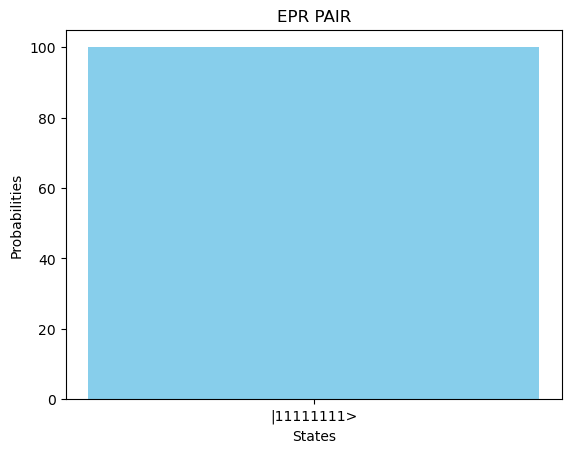

In [49]:
def build_mcx_circuit_v_method(n):
    prog = Program()
    #début du circuit
    qbits = prog.qalloc(n)
    #essaie de qbit 111

    if n == 1:
        prog.apply(X,qbits[0])
    elif n == 2:
        prog.apply(CNOT,qbits[0],qbits[1])
    else:
        # Apply CNOT gates to form the V-pattern
        for i in range(n-1):
            prog.apply(CNOT,qbits[i],qbits[n-1])
            for j in range(i+1, n-1):
                prog.apply(CNOT,qbits[i],qbits[j])
                prog.apply(CNOT,qbits[j],qbits[n-1])
                prog.apply(CNOT,qbits[i],qbits[j])  # Uncompute the previous CNOT
    circuit = prog.to_circ()
    circuit.display()
    job = circuit.to_job()
    linalgqpu = PyLinalg()
    result = linalgqpu.submit(job)
    l = len(result)
    states = ['']*l
    probabilities= [0]*l
    i=0
    for sample in result:
        print("State",sample.state,"with amplitude",
            sample.amplitude,"and probability",
            round(sample.probability*100,2),"%")
        states[i] = str(sample.state)
        probabilities[i] = round(sample.probability*100)
        i = i+1

    plt.bar(states, probabilities, color='skyblue')
    plt.xlabel('States')
    plt.ylabel('Probabilities')
    plt.title('EPR PAIR')
    plt.show()
    return prog

# Example usage:
n_qubits = 8
mcx_circuit_v_method = build_mcx_circuit_v_method(n_qubits)
